In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import math
import random

In [2]:
from google.colab import drive #to import the google drive data

In [3]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/ML nishit sir/kmean" 

/content/drive/My Drive/ML nishit sir/kmean


In [5]:
dataset = pd.read_excel('kmean.xlsx',sheet_name='ex7data2_X',header=None)

In [6]:
dataset.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:


x = np.array(dataset)



In [9]:
init_centroids = random.sample(range(0,len(dataset)),3)

In [10]:
init_centroids #index position of dataset

[26, 111, 80]

In [11]:
centroids=[]
for i in init_centroids:
    centroids.append(dataset.iloc[i])

In [12]:
centroids

[0    2.859626
 1    5.260420
 Name: 26, dtype: float64, 0    0.967913
 1    1.161668
 Name: 111, dtype: float64, 0    0.313198
 1    5.546946
 Name: 80, dtype: float64]

In [13]:
centroids = np.array(centroids)

In [14]:
def calc_distance(x,y):         #calculate distance between two points
    return (sum((x-y)**2))**0.5

In [15]:
def findclosetcentroids(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(calc_distance(i,j))
        assign_centroid.append(np.argmin(distance))        # np.argmin return index of min element
    return assign_centroid

In [16]:
get_centroid=findclosetcentroids(centroids,x)

In [17]:
def calc_centroids(cluster,x):
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    new_centroid=[]
    for c in set(new_df1['cluster']):     #return unique values of the clusters
        current_cluster=new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid

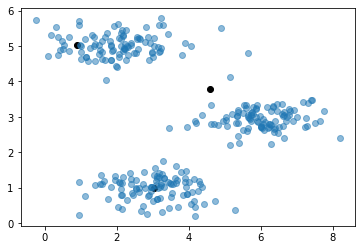

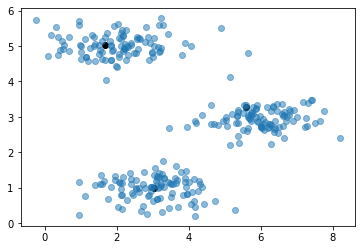

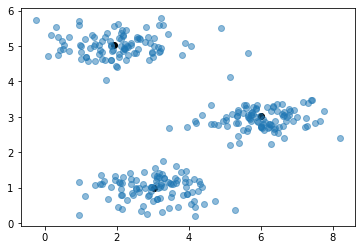

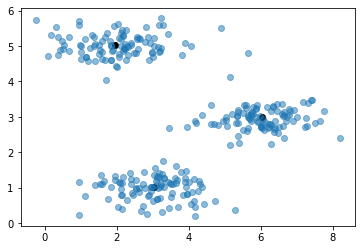

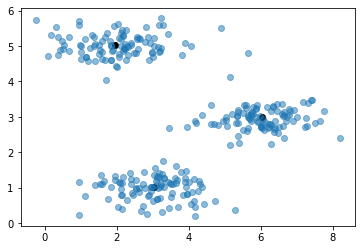

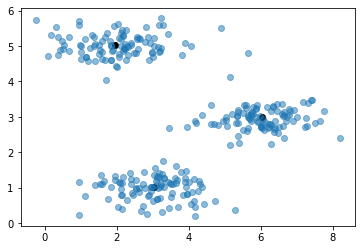

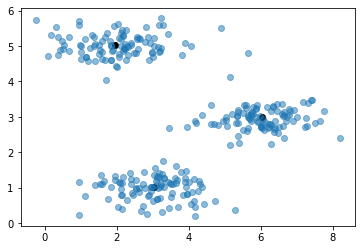

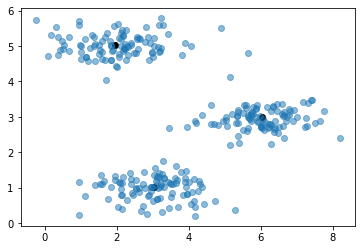

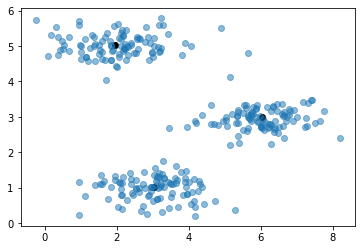

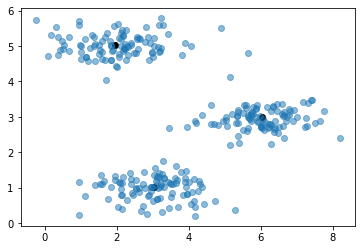

In [18]:
for i in range(10):
    get_centroid= findclosetcentroids(centroids,x)  #we have obtained the cluster number for each obervation
    centroids=calc_centroids(get_centroid,x)

    #visualization
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
    plt.show()

In [19]:
import cv2
im = cv2.imread('tom.jpeg')

In [20]:
im.shape

(200, 200, 3)

In [21]:
im= (im/255).reshape(200*200,3)

In [22]:
init_centroids = random.sample(range(0,len(im)),10)

In [23]:
init_centroids

[27251, 15088, 6499, 12721, 36529, 35856, 19304, 25748, 35158, 4232]

In [24]:
centroids=[]
for i in init_centroids:
    centroids.append(im[i])

In [25]:
im = np.array(im)

In [26]:
for i in range(15):
    print(i)
    get_centroid= findclosetcentroids(centroids,im) 
    centroids=calc_centroids(get_centroid,im)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [27]:
im_recovered = im.copy()
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroid[i]]

In [28]:
im_recovered = im_recovered.reshape(200,200, 3)

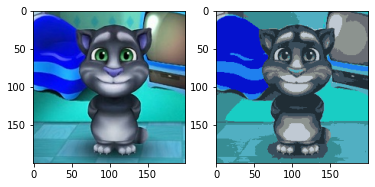

In [29]:
im1 = cv2.imread('tom.jpeg')

import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)